# Unspuervised Learning


### --- Clustering

1. K means method
   (to find k value we use elbow method)



In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [78]:
df = pd.read_csv('Live.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [79]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [80]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace= True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [82]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [83]:

df.drop_duplicates(inplace=True)

In [84]:
df.drop(columns = ['status_id', 'status_published'], inplace=True)

In [85]:
df.nunique()

status_type         4
num_reactions    1067
num_comments      993
num_shares        501
num_likes        1044
num_loves         229
num_wows           65
num_hahas          42
num_sads           24
num_angrys         14
dtype: int64

In [86]:
x = df
y = df['status_type']
y.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [92]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x['status_type_encoded'] = le.fit_transform(x['status_type'])

# Simply copy the encoded column to y
y = x['status_type_encoded']



In [88]:
x

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [89]:
cols = x.columns

In [93]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

x = ms.fit_transform(x)

In [ ]:
x = pd.DataFrame(x, columns=[cols])

In [ ]:
x.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(x)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [ ]:
kmeans.cluster_centers_

array([[3.46167950e-01, 3.61833423e-02, 7.27812657e-04, 7.13272262e-04,
        3.57027040e-02, 1.99861691e-03, 2.13215566e-03, 1.16037081e-03,
        2.63163571e-03, 1.24915717e-03],
       [9.83564249e-01, 6.92281072e-02, 2.92995889e-02, 3.22130472e-02,
        6.10062518e-02, 5.16536230e-02, 8.90485655e-03, 1.05300588e-02,
        8.13397894e-03, 7.82133186e-03]])

In [ ]:
kmeans.inertia_

231.09008425740083

In [ ]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 63 out of 6999 samples were correctly labeled.


In [ ]:
print("Accuracy score: {0:0.2f}".format(correct_labels/float(y.size)))

Accuracy score: 0.01


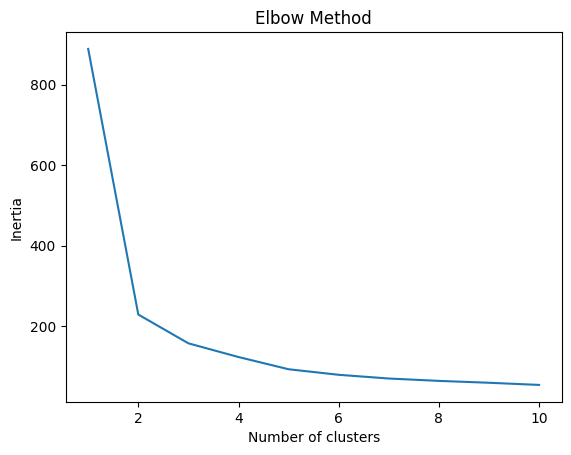

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', max_iter= 300, n_init=10, random_state=0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1,11),cs)
plt.xlabel('Number of clusters')
plt.title('Elbow Method')
plt.ylabel('Inertia')
plt.show()

In [ ]:
x = x.drop('status_type', axis=1)

In [ ]:
p

In [101]:


kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(x)

labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print("Accuracy score: {0:0.2f}".format(correct_labels/float(y.size)))


Result: 76 out of 6999 samples were correctly labeled.
Accuracy score: 0.01


In [102]:
import numpy as np
import pandas as pd

# Create a dataframe for analysis
df = pd.DataFrame({'true': y, 'cluster': labels})

# Build a mapping: cluster -> most common true label
mapping = df.groupby('cluster')['true'].agg(lambda x: x.value_counts().index[0])

print("Cluster to True Label Mapping:")
print(mapping)


Cluster to True Label Mapping:
cluster
0    1
1    3
2    1
3    2
4    3
Name: true, dtype: int64


In [103]:
# Convert cluster labels to match true encoded labels
predicted_encoded = np.array([mapping[c] for c in labels])
# Decode the encoded labels back to original category names
predicted_labels = le.inverse_transform(predicted_encoded)

# Similarly, you can decode y to original values
true_labels = le.inverse_transform(y)


In [104]:
correct_labels = np.sum(predicted_encoded == y)
accuracy = correct_labels / float(y.size)

print(f"Result: {correct_labels} out of {y.size} samples were correctly labeled.")
print(f"Accuracy score: {accuracy:.2f}")


Result: 6911 out of 6999 samples were correctly labeled.
Accuracy score: 0.99


In [110]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# -------------------------------
# 1. Ensure x is a pandas DataFrame
# -------------------------------
if not isinstance(x, pd.DataFrame):
    if isinstance(x, np.ndarray):
        # Automatically generate column names, last one is assumed to be 'status_type'
        columns = [f'col{i}' for i in range(x.shape[1]-1)] + ['status_type']
        x = pd.DataFrame(x, columns=columns)
    else:
        raise TypeError("x must be a pandas DataFrame or a NumPy array.")

# Verify 'status_type' exists
if 'status_type' not in x.columns:
    raise KeyError("Column 'status_type' not found in DataFrame")

# -------------------------------
# 2. Encode categorical labels
# -------------------------------
le = LabelEncoder()
x['status_type'] = x['status_type'].fillna('Unknown').astype(str)
x['status_type_encoded'] = le.fit_transform(x['status_type'])
y = x['status_type_encoded']

# -------------------------------
# Helper function to run KMeans and evaluate
# -------------------------------
def evaluate_kmeans(features, y_true, label_encoder):
    """Run KMeans, map clusters to majority true labels, and compute accuracy."""
    kmeans = KMeans(n_clusters=4, random_state=0)
    kmeans.fit(features)
    labels = kmeans.labels_

    # Map clusters to majority true labels
    df = pd.DataFrame({'true': y_true, 'cluster': labels})
    mapping = df.groupby('cluster')['true'].agg(lambda x: x.value_counts().index[0])

    # Predict encoded labels
    predicted_encoded = np.array([mapping[c] for c in labels])

    # Decode to original labels
    predicted_labels = label_encoder.inverse_transform(predicted_encoded)
    true_labels = label_encoder.inverse_transform(y_true)

    # Accuracy
    correct_labels = np.sum(predicted_encoded == y_true)
    accuracy = correct_labels / float(y_true.size)

    return accuracy, correct_labels, predicted_labels, true_labels

# -------------------------------
# 3. Run evaluation WITH 'status_type_encoded' included
# -------------------------------
features_with_encoded = x.drop(columns=['status_type'])  # Keep status_type_encoded
accuracy_with_encoded, correct_with, _, _ = evaluate_kmeans(features_with_encoded, y, le)

# -------------------------------
# 4. Run evaluation WITHOUT 'status_type_encoded'
# -------------------------------
features_without_encoded = x.drop(columns=['status_type', 'status_type_encoded'])  # Exclude both
accuracy_without_encoded, correct_without, _, _ = evaluate_kmeans(features_without_encoded, y, le)

# -------------------------------
# 5. Print results
# -------------------------------
print("=== Clustering Accuracy Comparison ===")
print(f"WITH status_type_encoded included:")
print(f"  Correctly labeled: {correct_with} out of {y.size}")
print(f"  Accuracy: {accuracy_with_encoded:.2f}\n")

print(f"WITHOUT status_type_encoded included:")
print(f"  Correctly labeled: {correct_without} out of {y.size}")
print(f"  Accuracy: {accuracy_without_encoded:.2f}\n")

# To confirm number of clusters
print("Unique clusters found (with encoded):", len(np.unique(KMeans(n_clusters=4, random_state=0).fit(features_with_encoded).labels_)))
print("Unique clusters found (without encoded):", len(np.unique(KMeans(n_clusters=4, random_state=0).fit(features_without_encoded).labels_)))


=== Clustering Accuracy Comparison ===
WITH status_type_encoded included:
  Correctly labeled: 6936 out of 6999
  Accuracy: 0.99

WITHOUT status_type_encoded included:
  Correctly labeled: 6865 out of 6999
  Accuracy: 0.98

Unique clusters found (with encoded): 4
Unique clusters found (without encoded): 4
